## Drive & import

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import


In [2]:
!pip install pytube
!pip install zsvision
!pip install hickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.1/819.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [3]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import json
import tarfile
import pickle
import hickle as hkl
import zsvision
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
from moviepy.editor import *

## Pre-pro

In [4]:
'''
! cp '/content/gdrive/MyDrive/Projet_Multimedia/download/download_queryd.py' /content/download_queryd.py
import download_queryd
os.getcwd()
!python download_queryd.py --txt_file /content/gdrive/MyDrive/Projet_Multimedia/download/relevant-video-links-v2.txt --task download_videos
!wget http://www.robots.ox.ac.uk/~vgg/research/collaborative-experts/data/QuerYD/json_metadata-v2.zip
import zipfile
with zipfile.ZipFile('/content/describe-api-results/json_metadata.zip', 'r') as zip_ref: zip_ref.extractall('/content/describe-api-results/endroit/')
!cd '/content/describe-api-results/endroit'
!wget http://www.robots.ox.ac.uk/~vgg/research/collaborative-experts/data/features-v2/QuerYD-experts-v2.tar.gz
!mv QuerYD-experts-v2.tar.gz QuerYD-experts.tar.gz
file = tarfile.open('/content/QuerYD-experts.tar.gz')
# extracting file
file.extractall('/content/gdrive/MyDrive/Projet_Multimedia/download/tar')
file.close()
!ls
'''

"\n! cp '/content/gdrive/MyDrive/Projet_Multimedia/download/download_queryd.py' /content/download_queryd.py\nimport download_queryd\nos.getcwd()\n!python download_queryd.py --txt_file /content/gdrive/MyDrive/Projet_Multimedia/download/relevant-video-links-v2.txt --task download_videos\n!wget http://www.robots.ox.ac.uk/~vgg/research/collaborative-experts/data/QuerYD/json_metadata-v2.zip\nimport zipfile\nwith zipfile.ZipFile('/content/describe-api-results/json_metadata.zip', 'r') as zip_ref: zip_ref.extractall('/content/describe-api-results/endroit/')\n!cd '/content/describe-api-results/endroit'\n!wget http://www.robots.ox.ac.uk/~vgg/research/collaborative-experts/data/features-v2/QuerYD-experts-v2.tar.gz\n!mv QuerYD-experts-v2.tar.gz QuerYD-experts.tar.gz\nfile = tarfile.open('/content/QuerYD-experts.tar.gz')\n# extracting file\nfile.extractall('/content/gdrive/MyDrive/Projet_Multimedia/download/tar')\nfile.close()\n!ls\n"

In [5]:
onlyfiles = [f for f in listdir('/content/gdrive/MyDrive/Projet_Multimedia/download/endroit') if isfile(join('/content/gdrive/MyDrive/Projet_Multimedia/download/endroit', f))]

In [6]:
categories = {}
labeled_files_name = set()
err = set()
dic = {}
path = '/content/gdrive/MyDrive/Projet_Multimedia/download/endroit/'
for count, file in enumerate(onlyfiles):
  new_path = path +file
  f = open(new_path)
  dic[file[6:-5]] = json.load(f)
  try:
    try:
      categories[dic[file[6:-5]]['result']['category']] +=1
    except:
      categories[dic[file[6:-5]]['result']['category']] = 1
    labeled_files_name.add(file[6:-5])
  except:
    err.add(file[6:-5])

In [7]:
dict(sorted(categories.items(), key=lambda item:item[1]))

{'Trailers': 1,
 'Autos & Vehicles': 18,
 'Gaming': 22,
 'Sports': 30,
 'Travel & Events': 36,
 'Music': 51,
 'News & Politics': 61,
 'Pets & Animals': 68,
 'Science & Technology': 72,
 'Nonprofits & Activism': 99,
 'Comedy': 132,
 'Howto & Style': 153,
 'Film & Animation': 349,
 'Entertainment': 363,
 'People & Blogs': 424,
 'Education': 780}

In [8]:
len(labeled_files_name)

2659

In [9]:
lang = set()
eng_labeled_files_name = set()
wo_l = set()
for count, file in enumerate(labeled_files_name):
  l = dic[file]['result']['audio_descriptions'][0]['language']
  lang.add(l)
  try:
    if l[:2]=='en':
      eng_labeled_files_name.add(file)
  except:
    wo_l.add(file)

In [10]:
audio_time = 0
for file in eng_labeled_files_name:
  for audio_clip in dic[file]['result']['audio_descriptions'][0]['audio_clips']:
    audio_time += audio_clip['duration']
audio_time/3600

71.89050641093536

In [13]:
dic['-lozRy6VCLCI']

{'type': 'success',
 'code': 1000,
 'status': 200,
 'message': 'Video metadata successfully retrieved',
 'result': {'audio_descriptions': [{'audio_clips': [{'_id': '5d40a90689ac8343b4474be0',
      'video': '5d3a1de7dbbff43e407ebec4',
      'audio_description': '5d3a1de7dbbff43e407ebec3',
      'user': '5d3a1d4ad69c6e2797a1613c',
      'label': '',
      'playback_type': 'inline',
      'start_time': 0,
      'end_time': 9.287981859410431,
      'duration': 9.287981859410431,
      'file_name': 'lozRy6VCLCI_5d40a90689ac8343b4474be0.wav',
      'file_size_bytes': 1638444,
      'file_mime_type': 'audio/wav',
      'file_path': '/current/lozRy6VCLCI',
      'created_at': 20190730203102,
      '__v': 0,
      'transcript': [{'_id': '5e5579b97f8232990368e87f',
        'sentence': ' Music director, doctor peter steen blick directs the chorus in a large',
        'start_time': 0.84,
        'end_time': 5.35},
       {'_id': '5e5579b97f8232990368e87e',
        'sentence': ' wood floor chorus 

In [12]:
dic[file]

{'type': 'success',
 'code': 1000,
 'status': 200,
 'message': 'Video metadata successfully retrieved',
 'result': {'audio_descriptions': [{'audio_clips': [{'_id': '58e7cf5d46e13dfd851a4524',
      'audio_description': '58e7cf3046e13dfd851a2363',
      'created_at': 20150822063957,
      'playback_type': 'extended',
      'file_size_bytes': 0,
      'updated_at': 20150822063957,
      'file_name': '14402507972271.wav',
      'start_time': 0,
      'legacy_video_id': 2065,
      'legacy_user_id': 2625,
      'label': '',
      'legacy_audio_clip_id': 14804,
      'video': '58e7cf2946e13dfd851a1c24',
      'end_time': 0,
      'file_mime_type:': 'audio/wav',
      'duration': 34.78,
      'file_path': '/legacy',
      'user': '58e7cf3046e13dfd851a2331',
      'transcript': [{'_id': '5e3acc08fdede558532228c4',
        'sentence': ' A young toddler with one cochlear implant visible,',
        'start_time': 1.1,
        'end_time': 5.24},
       {'_id': '5e3acc08fdede558532228c3',
        '

In [11]:
audio_time/3600, vid_time/3600, len(eng_labeled_files_name)

NameError: ignored

In [ ]:
for K in dic.keys():
  if '5k7e0f3r4' in K:
    print(K)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/indice_vid_labelled.csv')

In [ ]:
df['name']

In [ ]:
vid_time = 0
liste_dur = []
for count, file in enumerate(df['name']):
  liste_dur.append(dic[file]['result']['duration'])
liste_dur

In [ ]:
df['duree'] = liste_dur

In [ ]:
df.to_csv('/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/LVD.csv', index = False)

## Recupérer la transcription écrite de l'audio descriptive

In [ ]:
for strings in dic.keys():
  if '5k7e0f3r4' in strings:
    print(strings)

-__5k7e0f3r4


In [ ]:
dic['-__5k7e0f3r4']

{'type': 'success',
 'code': 1000,
 'status': 200,
 'message': 'Video metadata successfully retrieved',
 'result': {'audio_descriptions': [{'audio_clips': [{'_id': '5c2aca6bdb5fb418cbb9dbd0',
      'video': '5c2ac7abd3a30918d8e7a2b5',
      'audio_description': '5c2ac7abd3a30918d8e7a2b4',
      'user': '5c2ac693d3a30918d8e7a2b3',
      'label': '',
      'playback_type': 'inline',
      'start_time': 8.481382959945678,
      'end_time': 10.524738969015974,
      'duration': 2.043356009070295,
      'file_name': '__5k7e0f3r4_5c2aca6bdb5fb418cbb9dbd0.wav',
      'file_size_bytes': 360492,
      'file_mime_type': 'audio/wav',
      'file_path': '/current/__5k7e0f3r4',
      'created_at': 20190101020323,
      '__v': 0,
      'transcript': [{'_id': '5e16c909137a8cb729a4b2f8',
        'sentence': ' Black clover, as made by Sarah.',
        'start_time': 0.04,
        'end_time': 2}]},
     {'_id': '5c2aca80db5fb418cbb9dbd1',
      'video': '5c2ac7abd3a30918d8e7a2b5',
      'audio_descriptio

In [ ]:
dic[file]['result']['audio_descriptions'][0]['audio_clips'][0]

{'_id': '5bd352afb55a005b89021581',
 'video': '5ba83660c3271f04e440516a',
 'audio_description': '5ba83660c3271f04e4405169',
 'user': '59c25b2ec6c4802622d9c1bf',
 'label': '',
 'playback_type': 'inline',
 'start_time': 0,
 'end_time': 7.616145124716553,
 'duration': 7.616145124716553,
 'file_name': 'GoDvDNGaPUU_5bd352afb55a005b89021581.wav',
 'file_size_bytes': 1343532,
 'file_mime_type': 'audio/wav',
 'file_path': '/current/GoDvDNGaPUU',
 'created_at': 20181026174519,
 '__v': 0,
 'transcript': [{'_id': '5e1b14944c0dc733277dc344',
   'sentence': ' A multicolored mccaw hangs round on a green bench while walking around a little.',
   'start_time': 1.23,
   'end_time': 6.48}]}

In [ ]:
list_name_file=[]
list_sentence = []
list_id_audio_clip = []
list_id_audio_wo_transcript = []
list_wav_name = []
for file in eng_labeled_files_name:
  for audio_clip in dic[file]['result']['audio_descriptions'][0]['audio_clips']:
    try:
      transcript = audio_clip['transcript']
      sentence = ''
      for transc in transcript:
        sentence +=transc['sentence']
      if sentence == '':
        list_id_audio_wo_transcript.append(file)
      else:
        list_name_file.append(file)
        list_sentence.append(sentence)
        list_wav_name.append(audio_clip['file_name'])
        list_id_audio_clip.append(audio_clip['_id'])
    except:
      list_id_audio_wo_transcript.append(file)

In [ ]:
len(list_id_audio_clip), len(list_id_audio_wo_transcript)

(21509, 9103)

In [ ]:
df = pd.DataFrame({'name_vid': list_name_file, 'name_audio': list_wav_name, 'id_audio': list_id_audio_clip, 'contenue': list_sentence})
df

,name_vid,name_audio,id_audio,contenue
0,-G0E31788Nfg,14479589350451.wav,58e7cf6c46e13dfd851a50a8,Camera zooms out from the eyes of a zombie ch...
1,-G0E31788Nfg,14479589855281.wav,58e7cf6c46e13dfd851a50a9,You've constantly flashbacks to how the girl ...
2,-G0E31788Nfg,14479590220781.wav,58e7cf6c46e13dfd851a50aa,Her zombie corpse slowly ascends up towards t...
3,-G0E31788Nfg,14479591914761.wav,58e7cf6c46e13dfd851a50ab,Her body re enters the hotel bedroom in shard...
4,-G0E31788Nfg,14479592696931.wav,58e7cf6c46e13dfd851a50ac,The little girl in the flashback is still run...
...,...,...,...,...
21504,-OKaD4EcmZO8,OKaD4EcmZO8_5c67498784900704e4f0439e.wav,5c67498784900704e4f0439e,"And Now the woman is washing the dishes, and ..."
21505,-OKaD4EcmZO8,OKaD4EcmZO8_5c6749b484900704e4f0439f.wav,5c6749b484900704e4f0439f,Now they're sleeping. And the woman notices a...
21506,-OKaD4EcmZO8,OKaD4EcmZO8_5c6749d984900704e4f043a0.wav,5c6749d984900704e4f043a0,Now they're watching the skyline of new york ...
21507,-OKaD4EcmZO8,OKaD4EcmZO8_5c6749e984900704e4f043a1.wav,5c6749e984900704e4f043a1,Then the dog licks her face repeatedly.


In [ ]:
#df.to_csv('clip_name_sentence_wav.csv')

## Tar file

#### Text description

In [ ]:
objects = []
with (open('/content/gdrive/MyDrive/Projet_Multimedia/download/raw_captions_combined_filtered.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
list(objects[0].values())[0][:1]

[['dad', 'Smiles', 'his', 'lips', 'move', 'when', 'he', 'speaks']]

#### Agregate audio??

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

In [ ]:
# Load data
audio = hkl.load('/content/tared/data/QuerYD/structured-symlinks/aggregated_audio/vggish-raw.hickle')

/usr/local/lib/python3.10/dist-packages/hickle/lookup.py:1547: DataRecoveredWarning: loader 'b'!recover!'' missing for 'AttemptRecoverCustom' type object. Data recovered (data)
  warnings.warn(


In [ ]:
list(eng_labeled_files_name)[5]

'-CIJjyEK9jB8'

In [ ]:
arr = audio['\'video'+list(eng_labeled_files_name)[1]+"'"][0]

In [ ]:
arr.shape

(129, 128)

In [ ]:
 audio['\'video'+list(eng_labeled_files_name)[1]+"'"]

(array([[ 0.11237, -0.     ,  0.525  , ..., -0.     , -0.     , -0.     ],
        [ 0.0949 , -0.     ,  0.2369 , ..., -0.     , -0.     , -0.     ],
        [ 0.326  , -0.     ,  0.537  , ..., -0.     ,  0.0299 , -0.     ],
        ...,
        [ 0.5327 , -0.     ,  0.725  , ..., -0.     , -0.     , -0.     ],
        [ 0.1467 , -0.     ,  0.905  , ..., -0.     , -0.     , -0.     ],
        [-0.     ,  0.1456 ,  0.3052 , ..., -0.     ,  0.1814 ,  0.07294]],
       dtype=float16),
 {'base_type': 'dict_item',
  'key_base_type': 'str',
  'key_idx': 197,
  'key_type': b'\x80\x03cdill._dill\n_load_type\nq\x00X\x03\x00\x00\x00strq\x01\x85q\x02Rq\x03.'})

In [ ]:
arr.flatten().shape

(16512,)

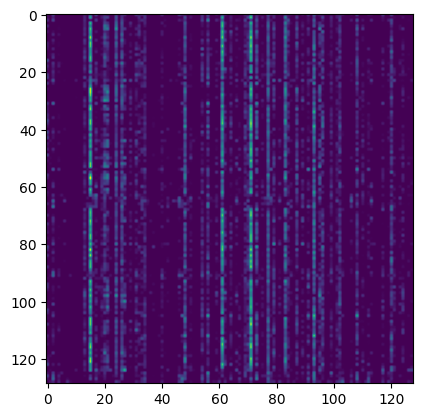

In [ ]:
plt.imshow(arr)

In [ ]:
Audio(np.mean(arr, axis=0), rate=16000)

#### Aggregated_imagenet

In [ ]:
imagenet = []
with (open('/content/tared/data/QuerYD/structured-symlinks/aggregated_imagenet_25fps_256px_stride1_offset0/resnext101_32x48d-avg.pickle', "rb")) as openfile:
    while True:
        try:
            imagenet.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
imagenet[0].__getitem__('video'+list(eng_labeled_files_name)[4]).shape

(2048,)

In [ ]:
imagenet[0].__getitem__('video'+list(eng_labeled_files_name)[4])

In [ ]:
list(audio.keys())[0]

#### Text embedding

##### howto100m_mil_nce.pkl

In [ ]:
ww = []
with (open('/content/tared/data/QuerYD/structured-symlinks/text_embeddings/howto100m_mil_nce.pkl', "rb")) as openfile:
    while True:
        try:
            ww.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
ww[0]['video'+list(eng_labeled_files_name)[3]][0].shape

(1, 512)

In [ ]:
len(ww[0]['video'+list(eng_labeled_files_name)[5]])

7

In [ ]:
ww[0]['video'+list(eng_labeled_files_name)[5]][6].shape

(1, 512)

##### w2v.pkl

In [ ]:
w2v = []
with (open('/content/tared/data/QuerYD/structured-symlinks/text_embeddings/w2v.pkl', "rb")) as openfile:
    while True:
        try:
            w2v.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
ww[0]['video'+list(eng_labeled_files_name)[3]][0].shape

(1, 512)

## Audio et transcription

In [ ]:
VideoPath = "/content/gdrive/MyDrive/Projet_Multimedia/videos/"

In [ ]:
VideoFiles = [f for f in listdir(VideoPath) if isfile(join(VideoPath, f))]
print("Il y a", len(VideoFiles), "vidéos.")

Il y a 2617 vidéos.


In [ ]:
print(VideoFiles[1][6:-5])

Wji-BZ0oCw


In [ ]:
from tqdm import tqdm

In [ ]:
for videoF in tqdm(VideoFiles):
  if videoF[5:-4] in eng_labeled_files_name:
    video = VideoFileClip(VideoPath + videoF)
    video.audio.write_audiofile("/content/gdrive/MyDrive/Projet_Multimedia/download/Audio/" + videoF[5:-4] +".mp3")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
videoF[5:-4] in eng_labeled_files_name

True

In [ ]:
video = VideoFileClip(mp4_file) # 2.
audio = video.audio # 3.

In [ ]:
audio

In [ ]:
# lecture du fichier
Audio(data=audio, rate=44100)

NameError: ignored